# Exploratory Data Analysis (EDA)

## 1. Setup and Load Data

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Set plot style
sns.set_style("whitegrid")

# Load the dataset
file_path = 'dataset/dataset.json' # Make sure this path is correct
with open(file_path, 'r') as f:
    data = json.load(f)

# Convert to pandas DataFrame
df = pd.DataFrame(data)

## 2. Basic Information and Validation

In [3]:
# Display basic information about the DataFrame
print("Dataset Info:")
df.info()

print("\n" + "="*50 + "\n")

# Display the first 5 rows to see the structure
print("First 5 examples:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   prompt      155 non-null    object
 1   completion  155 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


First 5 examples:
                                              prompt  \
0                        How do I reset my password?   
1                              I forgot my password.   
2                      I can't log in to my account.   
3  Help me, I need to change my password but I do...   
4                     Send me a password reset link.   

                                          completion  
0  1. Open the ShopSphere app.\n2. On the login s...  
1  1. Open the ShopSphere app.\n2. On the login s...  
2  1. Open the ShopSphere app.\n2. On the login s...  
3  1. Open the ShopSphere app.\n2. On the login s...  
4  1. Open the ShopSphere app.\n2. On the login s.

## 3. Analyze Text Lengths

Word Count Statistics:
       prompt_word_count  completion_word_count
count         155.000000             155.000000
mean            8.696774              67.516129
std             2.641758              12.397295
min             3.000000              48.000000
25%             7.000000              57.000000
50%             9.000000              67.000000
75%            10.000000              76.000000
max            15.000000              91.000000


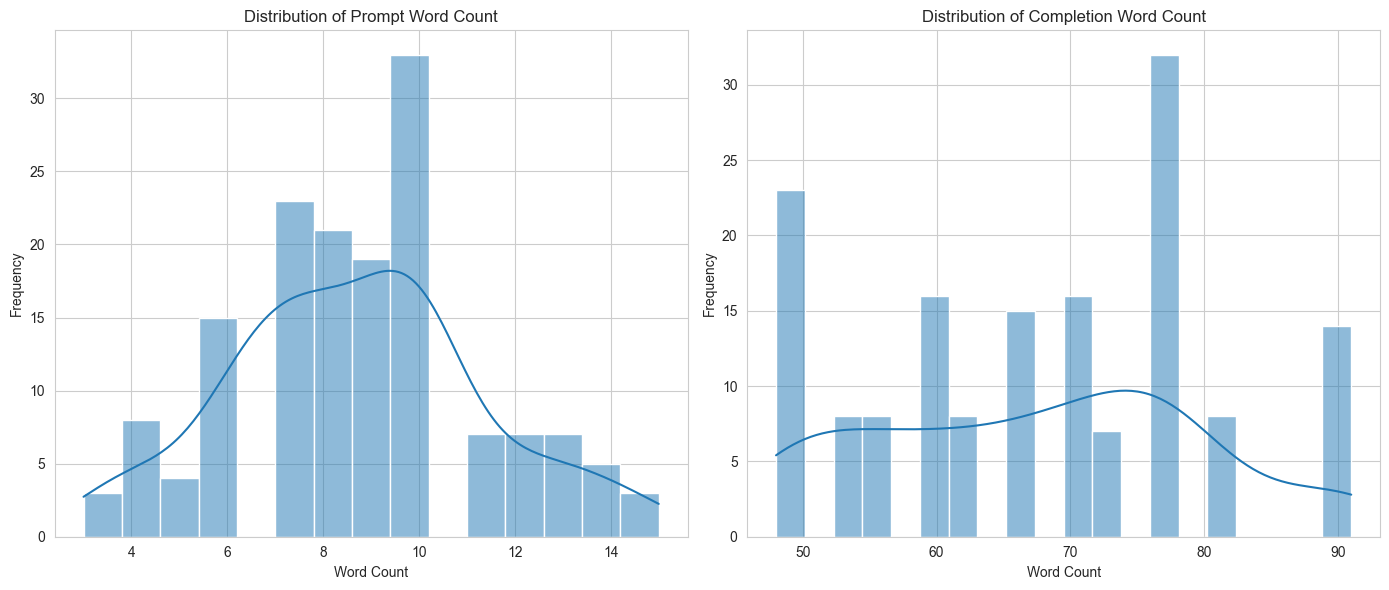

In [4]:
# Calculate the number of words in each prompt and completion
df['prompt_word_count'] = df['prompt'].apply(lambda x: len(x.split()))
df['completion_word_count'] = df['completion'].apply(lambda x: len(x.split()))

# Get summary statistics for the word counts
print("Word Count Statistics:")
print(df[['prompt_word_count', 'completion_word_count']].describe())

# Visualize the distributions
plt.figure(figsize=(14, 6))

# Plot for prompt length
plt.subplot(1, 2, 1)
sns.histplot(df['prompt_word_count'], bins=15, kde=True)
plt.title('Distribution of Prompt Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot for completion length
plt.subplot(1, 2, 2)
sns.histplot(df['completion_word_count'], bins=20, kde=True)
plt.title('Distribution of Completion Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4. Check for Duplicates

In [5]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)

if num_duplicates > 0:
    print(f"Found {num_duplicates} duplicate rows.")
    print(duplicate_rows)
else:
    print("✅ No duplicate prompt-completion pairs found.")

✅ No duplicate prompt-completion pairs found.


## 5. Topic Distribution Analysis

/var/folders/xx/n61_jy4s6ysgd1slcxzzzjgr0000gp/T/ipykernel_39369/1359687133.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['topic'], order=df['topic'].value_counts().index, palette='viridis')


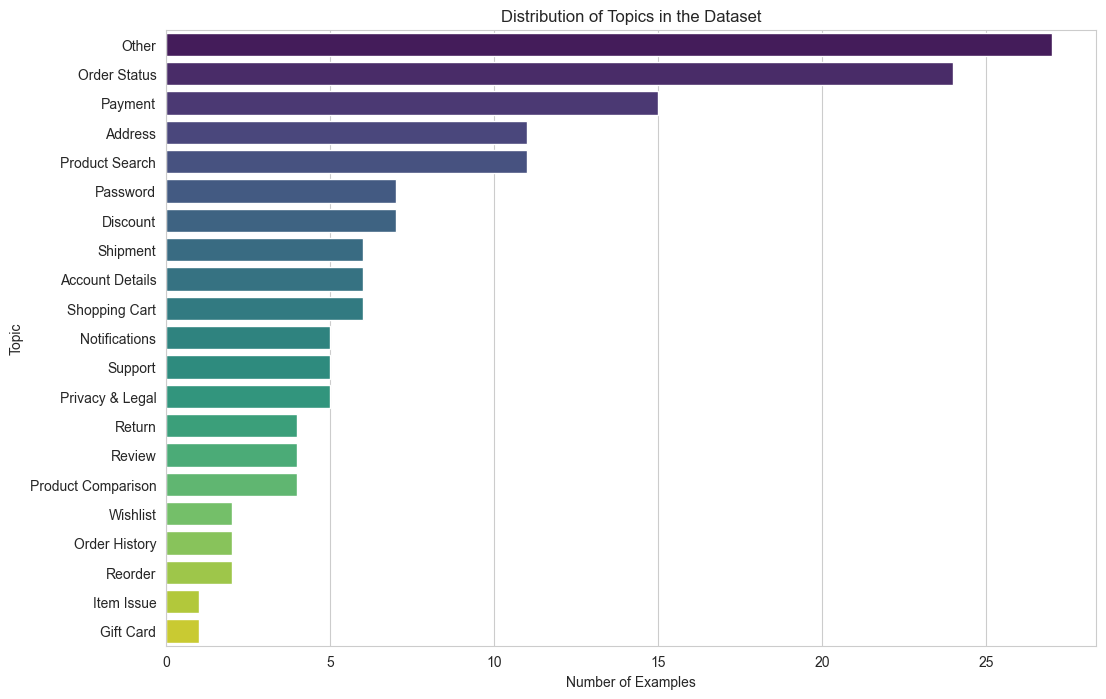

In [6]:
# List of topics and associated keywords
topic_keywords = {
    'Password': ['password', 'credentials', 'login', 'signin'],
    'Address': ['address', 'shipping', 'location', 'where to send'],
    'Payment': ['payment', 'card', 'billing', 'visa', 'mastercard'],
    'Order Status': ['order', 'status', 'where is my stuff', 'delivery update'],
    'Discount': ['discount', 'promo', 'coupon', 'code'],
    'Return': ['return', 'refund', 'send back', 'exchange'],
    'Review': ['review', 'rating', 'feedback', 'rate this'],
    'Shipment': ['shipment', 'tracking', 'track', 'shipped'],
    'Wishlist': ['wishlist', 'favorites', 'save for later', 'heart'],
    'Support': ['support', 'contact', 'help', 'customer service', 'speak to'],
    'Account Details': ['email', 'username', 'account details', 'my info', 'change name'],
    'Order History': ['history', 'past orders', 'receipts', 'previously bought'],
    'Gift Card': ['gift card', 'voucher', 'redeem', 'gift code'],
    'Product Search': ['search', 'find', 'look for', 'filter'],
    'Notifications': ['notification', 'alert', 'messages', 'updates'],
    'Product Comparison': ['compare', 'versus', 'vs', 'difference'],
    'Shopping Cart': ['cart', 'bag', 'basket', 'remove item', 'checkout'],
    'Privacy & Legal': ['privacy', 'legal', 'terms', 'data', 'policy'],
    'Reorder': ['reorder', 'buy again', 'repeat purchase', 'past purchase'],
    'Item Issue': ['damaged', 'wrong item', 'issue', 'broken', 'not working']
}

def assign_topic(prompt):
    prompt_lower = prompt.lower()
    for topic, keywords in topic_keywords.items():
        if any(keyword in prompt_lower for keyword in keywords):
            return topic
    return 'Other' # Assign a default topic if no keywords match

# Apply the function to create a 'topic' column
df['topic'] = df['prompt'].apply(assign_topic)

# Visualize the topic distribution
plt.figure(figsize=(12, 8))
sns.countplot(y=df['topic'], order=df['topic'].value_counts().index, palette='viridis')
plt.title('Distribution of Topics in the Dataset')
plt.xlabel('Number of Examples')
plt.ylabel('Topic')
plt.show()

## 6. N-gram Analysis (Most Common Phrases)

/var/folders/xx/n61_jy4s6ysgd1slcxzzzjgr0000gp/T/ipykernel_39369/732327990.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='bigram', data=df_prompts, palette='Blues_r')
/var/folders/xx/n61_jy4s6ysgd1slcxzzzjgr0000gp/T/ipykernel_39369/732327990.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='bigram', data=df_completions, palette='Greens_r')


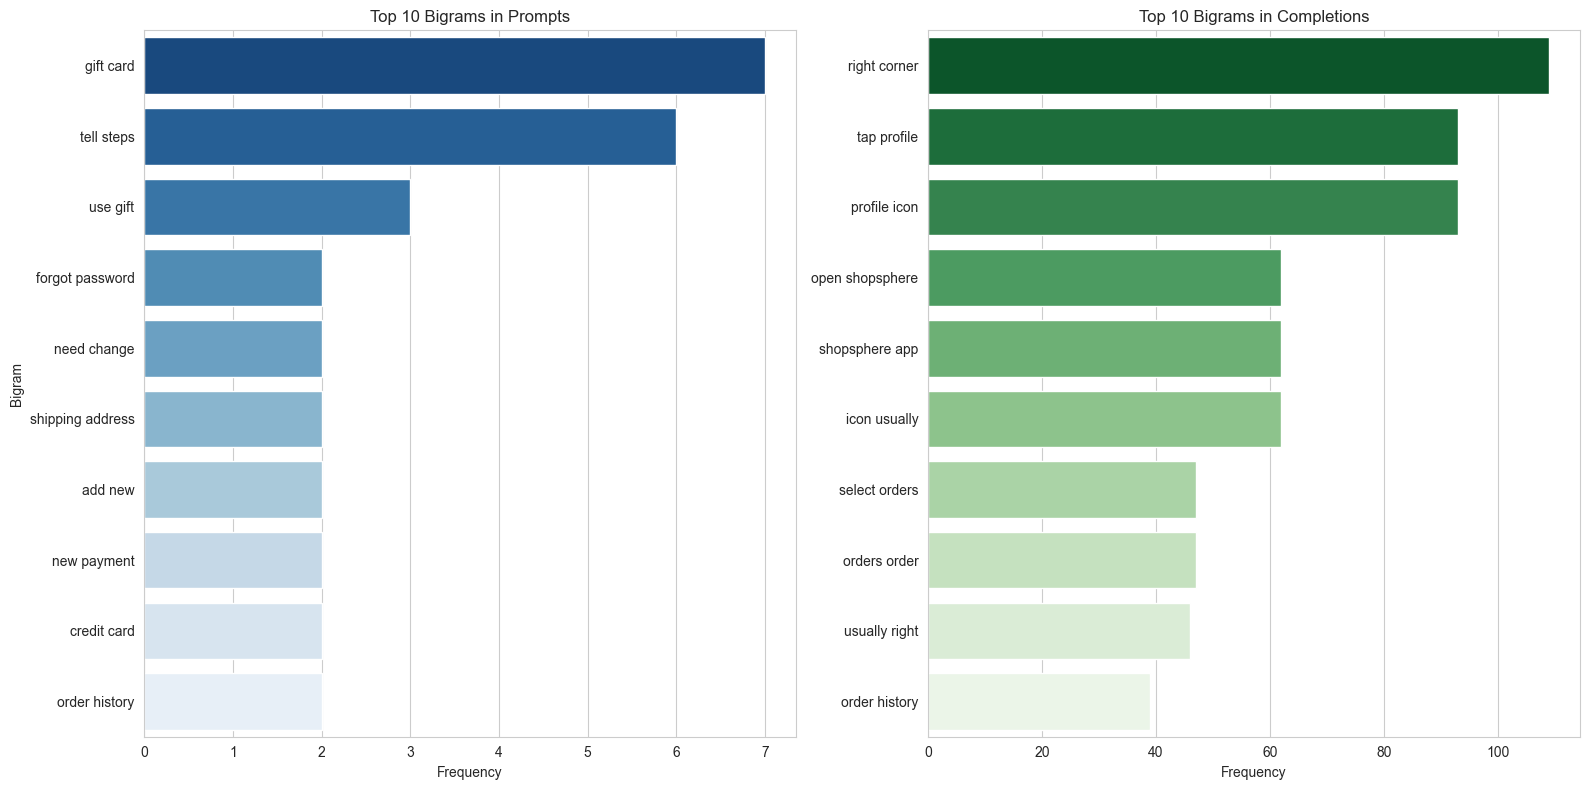

In [7]:
# --- Your existing function and data generation ---
def get_top_ngrams(corpus, ngram_range=(2, 2), top_k=10):
    """Extracts and returns the top K n-grams from a text corpus."""
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Get top bigrams for prompts
top_prompt_bigrams = get_top_ngrams(df['prompt'])

# Get top bigrams for completions
top_completion_bigrams = get_top_ngrams(df['completion'])


# --- New visualization code ---

# Convert the results to DataFrames for easy plotting
df_prompts = pd.DataFrame(top_prompt_bigrams, columns=['bigram', 'frequency'])
df_completions = pd.DataFrame(top_completion_bigrams, columns=['bigram', 'frequency'])

# Create the plots
plt.figure(figsize=(16, 8))

# Plot for Prompts
plt.subplot(1, 2, 1)
sns.barplot(x='frequency', y='bigram', data=df_prompts, palette='Blues_r')
plt.title('Top 10 Bigrams in Prompts')
plt.xlabel('Frequency')
plt.ylabel('Bigram')

# Plot for Completions
plt.subplot(1, 2, 2)
sns.barplot(x='frequency', y='bigram', data=df_completions, palette='Greens_r')
plt.title('Top 10 Bigrams in Completions')
plt.xlabel('Frequency')
plt.ylabel('') # Hide y-label for cleaner look

plt.tight_layout()
plt.show()

## 7. Advanced Data Cleaning and Validation

In [8]:
import re

def clean_and_validate(df):
    """Performs final cleaning and validation on the dataset."""
    inconsistent_rows = []
    
    for index, row in df.iterrows():
        # 1. Strip leading/trailing whitespace
        df.at[index, 'prompt'] = row['prompt'].strip()
        df.at[index, 'completion'] = row['completion'].strip()
        
        # 2. Validate that completion starts with "1."
        if not row['completion'].startswith('1.'):
            inconsistent_rows.append(index)
            
    if inconsistent_rows:
        print(f"Warning: Found {len(inconsistent_rows)} rows where completion does not start with '1.'")
        print("Indices of inconsistent rows:", inconsistent_rows)
    else:
        print("✅ All completions are correctly formatted.")

# Run the cleaning and validation
clean_and_validate(df)

✅ All completions are correctly formatted.
